In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geemap,ee
import matplotlib.colors as colors
from shapely.geometry import shape, box, Polygon, mapping, Point
from matplotlib import colors
import shapely
import matplotlib.patches as mpatches
import contextily as ctx
import geemap.colormaps as cm

In [2]:
ee.Authenticate()

True

In [3]:
ee.Initialize(project='ee-snmartinn31')

In [4]:
rios = gpd.read_file('Masas_Lacustres/masas_lacustres.shp')

Cannot find header.dxf (GDAL_DATA is not defined)


In [5]:
rios.to_crs(4326, inplace=True)

<Axes: >

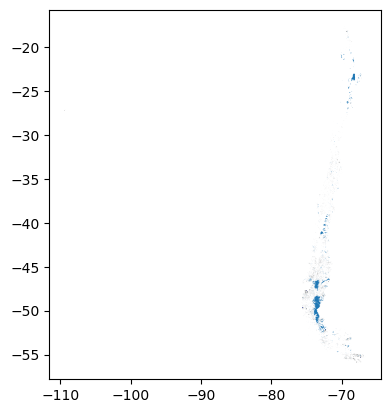

In [6]:
rios.plot()

In [7]:
glaciar = [[-73.2062204552081,-46.15011764265802],
[-72.64454442981747,-46.15011764265802],
[-72.64454442981747,-45.758670847843604],
[-73.2062204552081,-45.758670847843604],
[-73.2062204552081,-46.15011764265802]]

In [8]:
def getAOI_latlon(dat):
    aoi = ee.Geometry.Polygon(dat)
    return(aoi)

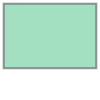

In [9]:
poligono_interes = Polygon(glaciar)
poligono_interes

In [11]:
rios['glaciar'] = poligono_interes

In [12]:
rios.to_crs(4326, inplace=True)

In [13]:
def lineas(row):
    nearest_point, _ = shapely.ops.nearest_points(row['geometry_x'], row['geometry_y'])
    return LineString([nearest_point, row['geometry_y']])

In [18]:
def find_nearest_and_distance(row):
    point1, point2 = shapely.ops.nearest_points(row['geometry'], row['glaciar'])
    distance = point1.distance(point2)
    return point1, point2, distance

# Apply the function row-wise and expand the results into separate columns
rios[['nearest_point', 'nearest_glaciar', 'distance']] = rios.apply(lambda row: pd.Series(find_nearest_and_distance(row)), axis=1)

In [28]:
rios.sort_values(by='distance')[:100]

,objectid,st_area_sh,st_length_,Nombre,Tipo,geometry,glaciar,nearest_point,nearest_glaciar,distance
16065,16517,6.826567e+05,7942.990377,Caja Rios,None,"POLYGON ((-72.91440 -46.15712, -72.91595 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-72.92851986260457 -46.15011764265802),POINT (-72.92851986260457 -46.15011764265802),0.000000
9107,9193,1.557294e+05,1717.710712,None,Laguna,"POLYGON ((-73.04012 -46.11746, -73.04046 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.04011825924826 -46.11745568480282),POINT (-73.04011825924826 -46.11745568480282),0.000000
9101,9187,4.411579e+04,889.845686,None,Laguna,"POLYGON ((-72.98511 -46.11348, -72.98495 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-72.98510700599547 -46.11348478845261),POINT (-72.98510700599547 -46.11348478845261),0.000000
9082,9168,1.139454e+05,1995.224499,None,Laguna,"POLYGON ((-73.19650 -46.09706, -73.19684 -46.0...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.19650295141622 -46.09706217887345),POINT (-73.19650295141622 -46.09706217887345),0.000000
8623,8709,8.334272e+06,19870.297778,Laguna Vera,Laguna,"POLYGON ((-72.78922 -45.71976, -72.78948 -45.7...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-72.76597380952644 -45.758670847843604),POINT (-72.76597380952644 -45.758670847843604),0.000000
...,...,...,...,...,...,...,...,...,...,...
9186,9272,6.915880e+04,1450.599060,None,Laguna,"POLYGON ((-73.25600 -46.14243, -73.25641 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.25241694864748 -46.14194869470353),POINT (-73.2062204552081 -46.14194869470353),0.046196
9298,9384,2.096330e+05,2684.851703,None,Laguna,"POLYGON ((-73.22171 -46.19384, -73.22121 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.22121387742206 -46.19387831515277),POINT (-73.2062204552081 -46.15011764265802),0.046258
8877,8963,9.746890e+04,1266.474814,None,Laguna,"POLYGON ((-73.25447 -45.91682, -73.25486 -45.9...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.25330313757358 -45.91503557769844),POINT (-73.2062204552081 -45.91503557769844),0.047083
8626,8712,9.971107e+04,1538.721228,None,Laguna,"POLYGON ((-73.13670 -45.71052, -73.13722 -45.7...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.13669977811243 -45.710518529409526),POINT (-73.13669977811243 -45.758670847843604),0.048152


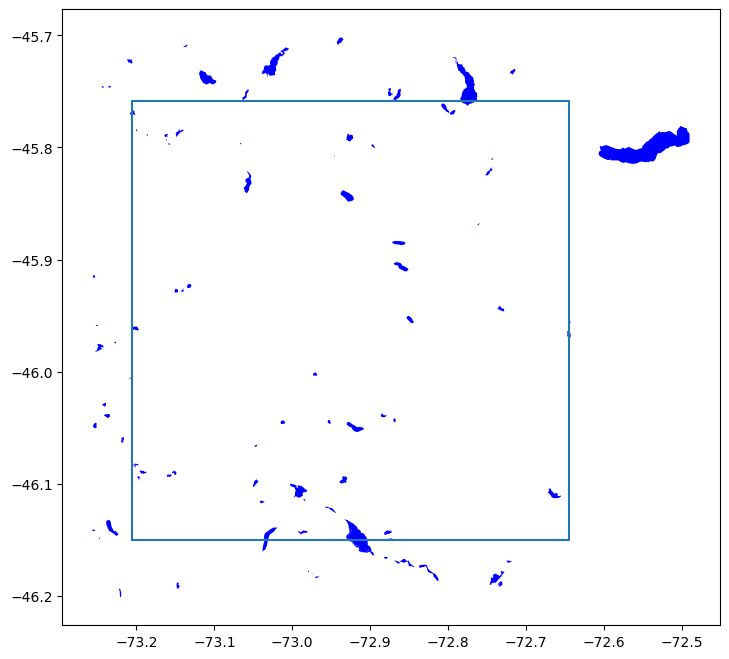

In [29]:
pos_x, pos_y = poligono_interes.boundary.xy


fig, ax = plt.subplots(figsize=(12,8))
rios.sort_values(by='distance')[:100].plot(color='blue', ax=ax)
plt.plot(pos_x, pos_y)
plt.show()